# Diabetes Prediction Model

This is a binary classification neural network model. The goal of this model is to be able to predict whether the patient is a diabetic (postive) or not (negative) based on the given history of the dataset.

### Aboout the Dataset
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

### Attributes Description

##### gender
- Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes. 
- 3 Categories: 
    - ***Male***
    - ***Female***
    - ***Other***
##### age
- Age is an important factor as diabetes is more commonly diagnosed in older adults.
- Age ranges from ***0-80*** in our dataset.
##### hypertension
- Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. 
- Values:
    - 0 => no hypertension 
    - 1 => have hypertension
##### heart_disease
- Heart disease is another medical condition that is associated with an increased risk of developing diabetes. 
- Values:
    - 0 => no heart disease 
    - 1 => have heart disease
##### smoking_history
- Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.
- 5 Categories: 
    - ***Not Current***
    - ***Former***
    - ***No Info***
    - ***Current***
    - ***Never***
##### bmi
- BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. 
- The range of BMI in the dataset is from ***10.16 to 71.55***. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.
- Values:

|                      |             |
|----------------------|-------------|
| BMI < 18.5           | underweight |
| 18.5 <= BMI <= 24.9  | normal      |
| 25 <= BMI <= 29.9    | overweight  |
| BMI > 30             | obese       |

##### HbA1c_level
- HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. 
- Higher levels indicate a greater risk of developing diabetes. 
- Mostly ***more than 6.5%*** of HbA1c Level indicates diabetes.
##### blood_glucose_level
- Blood glucose level refers to the amount of glucose in the bloodstream at a given time. 
- High blood glucose levels are a key indicator of diabetes.
##### diabetes (***Output variable***)
- Diabetes is the target variable being predicted.
- Values:
    - 0 => no diabetes
    - 1 => have diabetes

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

### Part 1 - Data Preprocessing

importing the dataset

In [2]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

# Print the dataset
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


#### Splitting the Dataset

Split the dataset into two parts:
- *input_varibles* - input features that are used to make the prediction
- *output_variable* - target variable to be predicted

In [3]:
# get all rows
# get the first columns till the second to the last column
# -1 denotes not including the last column
input_variables = dataset.iloc[:, 0:-1]

# get all rows
# get only the last column
output_variable = dataset.iloc[:, -1]

In [4]:
input_variables

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [5]:
output_variable = pd.DataFrame(output_variable, columns=["diabetes"])

output_variable

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


#### Encoding Categorical Data

Since most algorithms, perform mathematical operations, it is better to have numerical inputs instead of categorical data like gender, country.



We use the *Label Encoding* for the *Gender* column because it only has 2 values: 

    0 => Female, 1 => Male. 
    
*Label Encoding* is simple and efficient, it reduces the dimensionality of the data.

In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the gender column
input_variables['gender'] = label_encoder.fit_transform(input_variables['gender'])

input_variables


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,never,25.19,6.6,140
1,0,54.0,0,0,No Info,27.32,6.6,80
2,1,28.0,0,0,never,27.32,5.7,158
3,0,36.0,0,0,current,23.45,5.0,155
4,1,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90
99996,0,2.0,0,0,No Info,17.37,6.5,100
99997,1,66.0,0,0,former,27.83,5.7,155
99998,0,24.0,0,0,never,35.42,4.0,100


We use the *One Hot Encoder* for the *smoking_history*, as it is a nominal categorical variable

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Initialize ColumnTransformer with OneHotEncoder
column_transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')

# Fit and transform smoking_history column and convert to a DataFrame
input_variables = np.array(column_transformer.fit_transform(input_variables))

input_variables

array([[  0.  ,   0.  ,   0.  , ...,  25.19,   6.6 , 140.  ],
       [  1.  ,   0.  ,   0.  , ...,  27.32,   6.6 ,  80.  ],
       [  0.  ,   0.  ,   0.  , ...,  27.32,   5.7 , 158.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,  27.83,   5.7 , 155.  ],
       [  0.  ,   0.  ,   0.  , ...,  35.42,   4.  , 100.  ],
       [  0.  ,   1.  ,   0.  , ...,  22.43,   6.6 ,  90.  ]])

#### Splitting the Dataset: Training set and Testing set

Purpose:
- to evaluate how well the ML model is likely to perform unseen data
- reserving a portion of your data for testing, you can assess the model's generalization performance


In [8]:
from sklearn.model_selection import train_test_split

# Split dataset into features(input) and target(output)
input, output = input_variables, np.array(output_variable)

# Split into 70(training)/30(testing)
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.3, random_state=0)

input_train

array([[  1.  ,   0.  ,   0.  , ...,  27.32,   4.8 , 159.  ],
       [  1.  ,   0.  ,   0.  , ...,  16.02,   5.8 ,  90.  ],
       [  0.  ,   1.  ,   0.  , ...,  27.28,   6.6 , 159.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,  41.23,   9.  , 145.  ],
       [  0.  ,   0.  ,   0.  , ...,  30.18,   5.8 ,  90.  ],
       [  1.  ,   0.  ,   0.  , ...,  27.32,   4.5 , 158.  ]])

In [9]:
input_test

array([[  0.  ,   0.  ,   0.  , ...,  27.32,   4.8 , 140.  ],
       [  0.  ,   0.  ,   0.  , ...,  27.32,   4.8 , 100.  ],
       [  0.  ,   1.  ,   0.  , ...,  37.16,   6.6 ,  85.  ],
       ...,
       [  0.  ,   1.  ,   0.  , ...,  27.32,   6.2 , 145.  ],
       [  1.  ,   0.  ,   0.  , ...,  25.58,   5.7 , 200.  ],
       [  0.  ,   0.  ,   0.  , ...,  21.68,   5.7 , 155.  ]])

In [10]:
output_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [11]:
output_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

#### Feature Scaling

Feature scaling is a preprocessing technique in machine learning that transforms the numerical features of a dataset into a specific range or distribution.

In [12]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

input_train = standard_scaler.fit_transform(input_train)
input_test = standard_scaler.fit_transform(input_test)

#### Building the Artificial Neural Network(ANN)

In this step, we will begin developing the model.

##### General Outline of the proccess

- **Run Individual Experiments**

1. Experiment with different numbers of hidden layers and units per layer
2. Experiment with different activation functions in the hidden layers
3. Experiment with different optimizers


- **Analysis of Individual Experiments**

    Analyze how each factors affects the model performance. For each of the experiments, pick out the best configurations for the model.

- **Combining Factors for the Final Architecture of the Model**

    Combine the best-performing cofinguration from each of the categories(architecture, activation featuers, and optimizer).

- **Training the Final Model**

    Train the final nueral network model usng the training data

- **Evaluation and Validation**

    Evaluate the final model's performance on a separate validation dataset to ensure it generalizes well to unseen data.

In [13]:
import tensorflow as tf
from tensorflow import keras

#### Experiment with the architecture(number of hidden layers and unit per layer)



In [14]:
# Experiment with different architectures
num_hidden_layers = [1, 2, 3] 
num_units_per_layer = [12, 24, 36] 

# Result object for test loss and accuracy
results = {}

# Initialize variables to keep track of the best configuration and performance
best_architecture = None
best_accuracy = 0.0

In [15]:
# Function that trains the model with the experimented architecture
def experiment_architecture(hidden_layer, units_per_layer, input_train, output_train, input_test, output_test):
    model = keras.Sequential()

    # Build the input layer
    model.add(keras.layers.InputLayer(input_shape=(input_train.shape[1], ))) # specifies that the input data has one dimension for each feature

    # Add hidden layers as specified
    for _ in range(hidden_layer):
        model.add(keras.layers.Dense(
                        units=units_per_layer,  # units depending on the experiment
                        activation='relu'       # 'relu' => Rectified Linear Unit - common actvitation function in deep learning
        ))
        
    # Build the output layer
    model.add(keras.layers.Dense(
                        units=1,                # since it is a binary classification problem (output => 0 or 1)
                        activation='sigmoid'    # 'sigmoid' => common activation function for binary classification tasks
    ))

    # Compile the model
    model.compile(
        optimizer='adam',                       #  Adam optimizer => popular optimization algorithm
        loss='binary_crossentropy',             # 'binary_crossentropy' => suitable for binary classification problems
        metrics=['accuracy']                    #  model's performance will be evaluated using the 'accuracy' metric
    )

    # Train the model
    history = model.fit(                        
        input_train,             
        output_train, 
        epochs=10,                              #  iterations over the entire training dataset
        batch_size=32,                          #  size of each batch used for training
        validation_data=(input_test, output_test),
        verbose=0                               #  training progress wont be printed on the console
    )

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(input_test, output_test)

    return history, test_loss, test_accuracy

# Act as main function
for hidden_layer in num_hidden_layers:
    for units_per_layer in num_units_per_layer:
        key = (hidden_layer, units_per_layer)
        history, test_loss, test_accuracy = experiment_architecture(hidden_layer, units_per_layer, input_train, output_train, input_test, output_test)
        results[key] = {'test_loss': test_loss, 'test_accuracy': test_accuracy}

# Display the results
for key, value in results.items():
    hidden_layer, units_per_layer = key
    test_loss = value['test_loss']
    test_accuracy = value['test_accuracy']
    
    print(f"Hidden Layers: {hidden_layer}, Units per Layer: {units_per_layer}")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print()
    
    # Check if this configuration has the best accuracy so far
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_architecture = key

# Print the best configuration and performance
if best_architecture is not None:
    print(f"Best Configuration: Hidden Layers: {best_architecture[0]}, Units per Layer: {best_architecture[1]}")
    print(f"Best Test Accuracy: {best_accuracy:.4f}")
else:
    print("No results found.")
 

938/938 [==============================] - 1s 871us/step - loss: 0.0868 - accuracy: 0.9707
Hidden Layers: 1, Units per Layer: 12
Test Loss: 0.1065, Test Accuracy: 0.9659

Hidden Layers: 1, Units per Layer: 24
Test Loss: 0.1024, Test Accuracy: 0.9665

Hidden Layers: 1, Units per Layer: 36
Test Loss: 0.0991, Test Accuracy: 0.9690

Hidden Layers: 2, Units per Layer: 12
Test Loss: 0.0971, Test Accuracy: 0.9687

Hidden Layers: 2, Units per Layer: 24
Test Loss: 0.0904, Test Accuracy: 0.9695

Hidden Layers: 2, Units per Layer: 36
Test Loss: 0.0874, Test Accuracy: 0.9710

Hidden Layers: 3, Units per Layer: 12
Test Loss: 0.0872, Test Accuracy: 0.9702

Hidden Layers: 3, Units per Layer: 24
Test Loss: 0.0869, Test Accuracy: 0.9705

Hidden Layers: 3, Units per Layer: 36
Test Loss: 0.0868, Test Accuracy: 0.9707

Best Configuration: Hidden Layers: 2, Units per Layer: 36
Best Test Accuracy: 0.9710


#### Experiment with different activation functions in the hidden layer

1. ReLU (Rectified Linear Unit):
    - Formula: f(x) = max(0, x)
    - Range: [0, ∞)
    - Advantages:
        - Computationally efficient because it involves simple thresholding.
        - Helps mitigate the vanishing gradient problem, which can occur with some other activation functions.
        - Promotes sparse activation, meaning it can lead to sparsity in neural network activations, which can be beneficial.
    - Commonly used in hidden layers of deep neural networks, especially for convolutional neural networks (CNNs) and feedforward networks.
    <br/><br/>
2. Sigmoid:
    - Formula: f(x) = 1 / (1 + e^(-x))
    - Range: (0, 1)
    - Advantages:
        - Outputs are squashed between 0 and 1, making it suitable for binary classification problems where you want to model probabilities.
        - Well-suited for the output layer of binary classifiers.
    - Disadvantages:
        - Suffers from the vanishing gradient problem, particularly during backpropagation in deep networks.
        - Not centered around zero, which can slow down training.
        - Commonly used in the output layer for binary classification and in some older models.
    <br/><br/>
3. tanh (Hyperbolic Tangent):
    - Formula: f(x) = (e^(x) - e^(-x)) / (e^(x) + e^(-x))
    - Range: (-1, 1)
    - Advantages:
        - Similar to the sigmoid, but centered around zero, which can help in training deep networks.
        - Captures both positive and negative values, making it suitable for tasks that involve capturing signed information.
    - Disadvantages:
        - Still suffers from the vanishing gradient problem, particularly in deep networks.
        - Commonly used in hidden layers, especially in recurrent neural networks (RNNs) and older feedforward networks.

In [16]:
# Experiment with different activation functions
activation_functions = ['relu', 'sigmoid', 'tanh']

results = {}

# Initialize variables to keep track of the best configuration and performance
best_activation_function = None
best_accuracy = 0.0

In [17]:
def experiment_activation_function(activation_function, input_train, output_train, input_test, output_test):
    model = keras.Sequential()
    
    # Input layer
    model.add(keras.layers.InputLayer(input_shape=(input_train.shape[1],)))   # specifies that the input data has one dimension for each feature
    
    # Hidden layers with specified activation function
    model.add(keras.layers.Dense(units=64, activation=activation_function))   # 2 hidden layers with 64 units each with the given activation function
    model.add(keras.layers.Dense(units=64, activation=activation_function))
    
    # Output layer
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))              # binary classification
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # same reason as above
    
    # Train the model
    history = model.fit(input_train, output_train, epochs=10, batch_size=32, validation_data=(input_test, output_test), verbose=0) # same reason as above
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(input_test, output_test)
    
    return history, test_loss, test_accuracy

# Act as the main function
for activation_function in activation_functions:
    history, test_loss, test_accuracy = experiment_activation_function(activation_function, input_train, output_train, input_test, output_test)
    results[activation_function] = {'test_loss': test_loss, 'test_accuracy': test_accuracy}

# Display the results
for activation_function, value in results.items():
    test_loss = value['test_loss']
    test_accuracy = value['test_accuracy']
    
    print(f"Activation Function: {activation_function}")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print()
    
    # Check if this activation function has the best accuracy so far
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_activation_function = activation_function

# Print the best-performing activation function and its accuracy
if best_activation_function is not None:
    print(f"Best Activation Function: {best_activation_function}")
    print(f"Best Test Accuracy: {best_accuracy:.4f}")
else:
    print("No results found.")

938/938 [==============================] - 1s 1ms/step - loss: 0.0902 - accuracy: 0.9690
Activation Function: relu
Test Loss: 0.0862, Test Accuracy: 0.9708

Activation Function: sigmoid
Test Loss: 0.1111, Test Accuracy: 0.9614

Activation Function: tanh
Test Loss: 0.0902, Test Accuracy: 0.9690

Best Activation Function: relu
Best Test Accuracy: 0.9708


#### Experiment with different optimizers

1. Adam (Adaptive Moment Estimation):
    - An extension of the stochastic gradient descent (SGD) optimization algorithm that combines the advantages of both the Adagrad and RMSprop optimizers.
    - It uses adaptive learning rates for each parameter, meaning it automatically adjusts the learning rate during training based on the past gradients.
    - Also includes momentum, which helps the optimization process by accumulating past gradients to speed up convergence.
    - Key Hyperparameters:
        - Learning rate (lr): Determines the step size during weight updates.
        - Beta1 (beta1) and Beta2 (beta2): Exponential decay rates for the moment estimates. Common values are close to 1.
        - Epsilon (epsilon): A small constant added to prevent division by zero.
    - Advantages:
        - Fast convergence for a wide range of problems.
        - Works well with default hyperparameters for many tasks.
        - Commonly used as a default optimizer choice.
    <br/><br/>
2. SGD (Stochastic Gradient Descent):
    - One of the simplest optimization algorithms used in neural networks.
    - It updates model weights based on the gradient of the loss function with respect to each parameter.
    - SGD uses a fixed learning rate, which can be a challenge to tune for optimal performance.
    - Key Hyperparameters:
        - Learning rate (lr): Determines the step size during weight updates.
    - Advantages:
        - Simplicity and low memory requirements.
        - Can be useful for small datasets or when fine-tuning pre-trained models.
    - Disadvantages:
        - Slower convergence compared to more advanced optimizers.
        - Sensitive to the choice of learning rate and may require tuning.
    <br/><br/>
3. RMSprop (Root Mean Square Propagation):
    - RMSprop is an adaptive learning rate optimization algorithm.
    - It keeps a moving average of squared gradients for each weight and adapts the learning rate accordingly.
    - RMSprop helps address the problem of rapidly decreasing learning rates in Adagrad by using a decaying average.
    - Key Hyperparameters:
        - Learning rate (lr): Determines the step size during weight updates.
        - Decay rate (rho or beta): Controls the moving average of squared gradients. Common values are close to 0.9.
        - Epsilon (epsilon): A small constant added to prevent division by zero.
    - Advantages:
        - Adaptive learning rates allow for faster convergence and better handling of different feature scales.
        - Less sensitive to the choice of the learning rate compared to SGD.

In [18]:
# Experiment with different optimizers
optimizers = ['adam', 'sgd', 'rmsprop']

results = {}

# Initialize variables to keep track of the best configuration and performance
best_optimizer = None
best_accuracy = 0.0

In [19]:
def experiment_optimizer(optimizer, input_train, output_train, input_test, output_test):
    model = keras.Sequential()
    
    # Input layer
    model.add(keras.layers.InputLayer(input_shape=(input_train.shape[1],)))
    
    # Hidden layers
    model.add(keras.layers.Dense(units=64, activation='relu'))
    model.add(keras.layers.Dense(units=64, activation='relu'))
    
    # Output layer
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))  # Binary classification
    
    # Compile the model with the specified optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(input_train, output_train, epochs=10, batch_size=32, validation_data=(input_test, output_test), verbose=0)
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(input_test, output_test)
    
    return history, test_loss, test_accuracy

# Act as main function
for optimizer in optimizers:
    history, test_loss, test_accuracy = experiment_optimizer(optimizer, input_train, output_train, input_test, output_test)
    results[optimizer] = {'test_loss': test_loss, 'test_accuracy': test_accuracy}

# Display the results
for optimizer, value in results.items():
    test_loss = value['test_loss']
    test_accuracy = value['test_accuracy']
    
    print(f"Optimizer: {optimizer}")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print()
    
    # Check if this optimizer has the best accuracy so far
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_optimizer = optimizer

# Print the best-performing optimizer and its accuracy
if best_optimizer is not None:
    print(f"Best Optimizer: {best_optimizer}")
    print(f"Best Test Accuracy: {best_accuracy:.4f}")
else:
    print("No results found.")


938/938 [==============================] - 1s 1ms/step - loss: 0.0911 - accuracy: 0.9703
Optimizer: adam
Test Loss: 0.0872, Test Accuracy: 0.9705

Optimizer: sgd
Test Loss: 0.1153, Test Accuracy: 0.9609

Optimizer: rmsprop
Test Loss: 0.0911, Test Accuracy: 0.9703

Best Optimizer: adam
Best Test Accuracy: 0.9705


#### Combining Factors for the Final Architecture of the Model

In [20]:
print("Best Configurations:")
print("Best Architecture: ")
print(f"\tHidden Layers: {best_architecture[0]}, Units per Layer: {best_architecture[1]}")
print(f"Best Activation Function: {best_activation_function}")
print(f"Best Optimizer: {best_optimizer}")

results = {}

Best Configurations:
Best Architecture: 
	Hidden Layers: 2, Units per Layer: 36
Best Activation Function: relu
Best Optimizer: adam


In [26]:
def final_model(architecture, activation_function, optimizer, input_train, output_train, input_test, output_test):
    model = keras.Sequential()
    
    # Input layer
    model.add(keras.layers.InputLayer(input_shape=(input_train.shape[1],)))
    
    # Hidden layers
    for _ in range(architecture[0]):
        model.add(keras.layers.Dense(units=architecture[1], activation=activation_function))
    
    # Output layer
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))  # Binary classification
    
    # Compile the model with the specified optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(input_train, output_train, epochs=10, batch_size=32, validation_data=(input_test, output_test), verbose=0)
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(input_test, output_test)
    
    return history, test_loss, test_accuracy

# Display the results
history, test_loss, test_accuracy = final_model(best_architecture, best_activation_function, best_optimizer, input_train, output_train, input_test, output_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
print()

938/938 [==============================] - 1s 970us/step - loss: 0.0861 - accuracy: 0.9713
Test Loss: 0.0861, Test Accuracy: 0.9713



#### Making the Predictions

In [25]:
model = tf.keras.models.Sequential()

prediction = model.predict(input_test)
prediction = prediction[:, -1].reshape(-1, 1)
prediction = np.array((prediction > 0.5))

prediction.shape

938/938 [==============================] - 1s 732us/step


(30000, 1)

#### Making the Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

output_test = np.array(output_test).flatten()

# Create a confusion matrix
conf_matrix = confusion_matrix(output_test, prediction)

print("Confusion Matrix:")
print(conf_matrix)

print("\nAccuracy Score: ", accuracy_score(output_test, prediction))

Confusion Matrix:
[[21106  6355]
 [  959  1580]]

Accuracy Score:  0.7562


#### Display Confusion Matrix

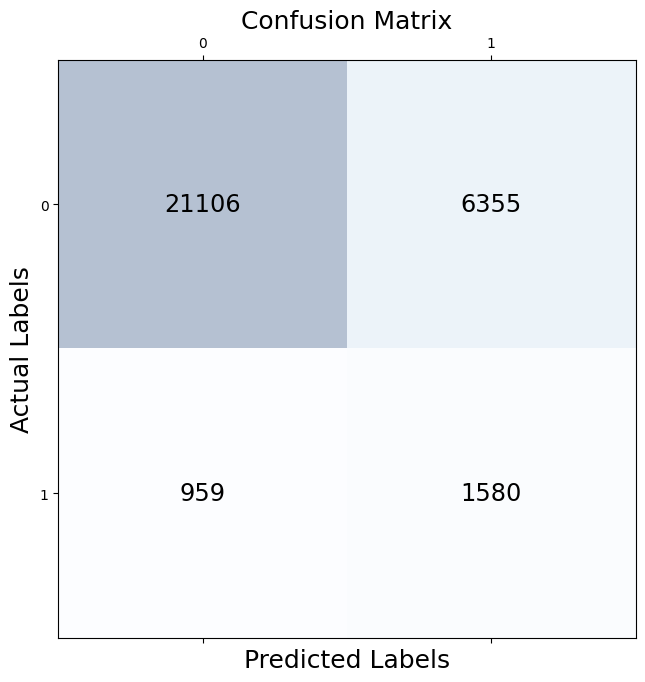

In [27]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(7.5, 7.5))

# Display the confusion matrix as a heatmap with a blue color map and transparency
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

# Loop through rows and columns of the confusion matrix
for row in range(conf_matrix.shape[0]):
    for column in range(conf_matrix.shape[1]):
        # Add text with the value of each cell in the center
        ax.text(x=column, y=row, s=conf_matrix[row, column], va='center', ha='center', size='xx-large')

# Set labels for the x and y axes
plt.xlabel('Predicted Labels', fontsize=18)
plt.ylabel('Actual Labels', fontsize=18)

# Set the title of the plot
plt.title('Confusion Matrix', fontsize=18)

# Display the plot
plt.show()

#### Conclusion

**Training Accuracy (0.9713)**

During training, your model achieved a high training accuracy of 0.976. This suggests that the model learned to fit the training data very well. However, a high training accuracy does not necessarily imply good generalization.

**Testing Accuracy (0.756)**

After making predictions on the test data, the accuracy dropped to 0.756. This indicates that the model is not performing as well on unseen data as it did on the training data.

The most likely explanation for this drop in accuracy is *overfitting*. ***Overfitting*** occurs when the model becomes too complex and starts to learn noise in the training data rather than the underlying patterns. As a result, it fails to generalize well to new, unseen data.

To resolve *overfitting*, possible imporvements to make:
1. Add more data to train the model more accurately
2. Experiment with different values of the 3 factors.
3. Implement *early stopping* to monitor validation loss and stop the training when it starts increasing